# Assignment 1: Neural Network from Scratch (100 marks)
## Trimester 2022  June 

Assignment 1 contributes 10 marks to your total mark for the course. It is divided into 2 parts:
* **Part 1**: Coding (50%)
    * You are expected to implement an L-layered neural network from scratch.
    * Deadline: submit to WBLE by **19 July 2022 (Week 6 Tue)**
* **Part 2**: Theory (50%)
    * You will be tested on your theoretical understanding of the network you have implemented. This is a physical test that shall be conducted during our lecture class on Wednesday.
    * Date: **20 July 2022 (Week 6 Wed)**
    * Time: **During class**
    * Venue: **TBD (Physical)**

---
### Part 1: System Implementation (50%)
This lab sheet belongs to part 1. You are expected to use the sklearn and numpy libraries to implement the deep learning system from scratch. PyTorch or other deep learning framework is not allowed. 

The task is to build an L-layer standard neural network as follows: 


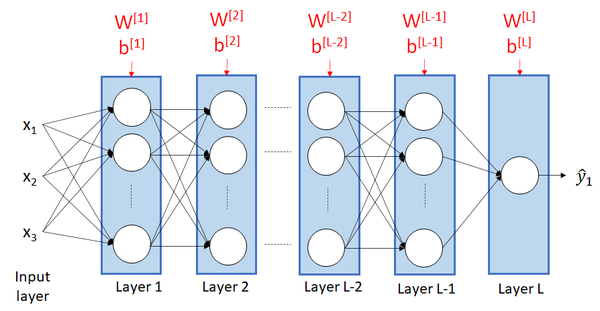

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
cd "/content/gdrive/MyDrive/UCCD3074_Labs/Assignment1"

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

---

## SECTION 1: THE BREAST CANCER WISCONSON DATASET

This section loads the [breast cancer Wisconson dataset](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). The task is to classify a samples into either malignant (positive) or benign (negative) classes.

There are two possible categories of all samples:
1. 'M': Malignant
2. 'B': Benign

30 features are extracted for 10 properties of a fine needle aspirate (FNA) of a breast mass image. The 10 properties are:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension ("coastline approximation" - 1)

For each of the features, the mean, standard error and "worst" or largest (mean of the three largest values) of these features were extracted for each image,
resulting in 30 features. 

The following code loads the dataset into `X` and `Y`.


In [3]:
def load_dataset(csv_file):
    df = pd.read_csv(csv_file, index_col="id")
    fea = df.drop(columns = ['diagnosis'])
    Y = (df.diagnosis == 'M').astype('int').values[np.newaxis, :]
    return fea, Y

In [4]:
fea_train, Y_train = load_dataset("trainset.csv")

In [5]:
fea_train.shape

(499, 30)

**Question 1 (6 marks)**: Write the code to show the following values.

1. How many samples are in the training set?

In [6]:
### START CODE HERE ### (~1 line of code)
m = fea_train.shape[0]
### END CODE HERE ###

print('Number of samples =', m)

Number of samples = 499


2. How many malignant and non-malignant samples in the training set?

In [7]:
### START CODE HERE ### (~1 line of code)
num_malignant, num_benign = np.count_nonzero(Y_train), (Y_train == 0).sum()
### END CODE HERE ###

print('Number of benign samples', num_benign)
print('Number of malignant samples', num_malignant)

Number of benign samples 322
Number of malignant samples 177


3. Show the min and max values of the *mean* value for the `perimeter` property of the training samples.

In [8]:
### START CODE HERE ### (~2 lines of code)
min_perimeter_mean = np.min(fea_train["perimeter_mean"], 0)
max_perimeter_mean = np.max(fea_train["perimeter_mean"], 0)
### END CODE HERE ###

print('The min value of perimeter is', min_perimeter_mean)
print('The max value of perimeter is', max_perimeter_mean)

The min value of perimeter is 43.79
The max value of perimeter is 188.5


**Question 2 (4 marks)**: Transforming the data by performing the following operations
1. Standardize all features for so that they have a mean of 0 and standard deviation of using sklearn's `StandardScaler` library.
2. Then, transpose `fea_train` to get the input matrix `X_train`. The final shape of X_train should be `(30, 499)`.

In [9]:
scaler = StandardScaler()

In [10]:
### START CODE HERE ### (~1 line of code)
X_train = np.transpose(scaler.fit_transform(fea_train))
### END CODE HERE ###

print('Shape of X_train:', X_train.shape)

Shape of X_train: (30, 499)


---

## SECTION 2: INITIALIZING THE NETWORK PARAMETERS

**Question 3 (4 marks)**: Complete the function `init_params` to initialize the network parameters. The function creates and initializes the network parameters for all $L$ layers: $W^{[1]}$, ...,  $W^{[L]}$ and bias $b^{[1]}$, ...,  $b^{[L]}$.

* Use small random initialization (`np.random.randn(<shape>)*0.01`) for the weight matrices $W^{[1]}$,  $W^{[2]}$, ...,  $W^{[L]}$.
* Use zero initialization (`np.zeros(<shape>)`)for the biases $b^{[1]}$,  $b^{[2]}$, ...,  $b^{[L]}$.

Input:
- The input argument `layer_sizes` is a  tuple containing the size of each layer, i.e., ($n_x$, $n^{[1]}$, $n^{[2]}$, ..., $n^{[L-1]}$, $n_y$). For example, `(30, 50, 1)` denotes a 2-layer neural network where $n_x$ = 30 (input layer, each sample has 30 features), $n^{[1]}$ = 50 (#unit in layer 1) and $n^{[2]} = n_y$ = 1 (output layer for binary classification)

Output:
- The output `parameters` is a dictionary `parameters` that stores the parameters of all layers:
    ```
    parameters = {'W1': ...,
                  'b1': ..., 
                      ...
                  'WL': ...,
                  'bL': ...
                 }
    ```

In [11]:
def init_params(layer_sizes):
    """
    Arguments:
    -----------
    - layer_sizes: tuple
        A list or tuple containing the dimensions of each layer 
        (including the input layer) in our network
    
    Returns:
    ------------
    - parameters: dictionary
        A dictionary to store the parameters for all layers. The keys are 
        "W1", "b1", ..., "WL", "bL"
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_sizes)-1            # number of layers in the network

    for l in range(1, L+1):
        
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layer_sizes[l], layer_sizes[l-1])*0.01
        parameters['b' + str(l)] = np.zeros((layer_sizes[l], 1))
        ### END CODE HERE ###
        
        assert(parameters['W' + str(l)].shape == (layer_sizes[l], layer_sizes[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_sizes[l], 1))
        
    return parameters

---
## SECTION 3: IMPLEMENT THE FORWARD PROPAGATION ALGORITHM


**Question 4 (16 marks)**. Implement the `forward_one_layer` function which performs forward propagation across **one** layer of the network. 


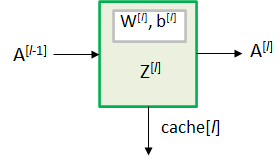

The function `forward_one_layer` computes the value of $A^{[l]}$ through two phases.

* The **linear phase** computes the following equations: 

    $$Z^{[l]} = W^{[l]}A^{[l-1]} +b^{[l]}$$

    where $A^{[0]} = X$. 

* The **activation phase** transforms the weighted input $Z^{[l]}$ using a non-linear function. The function allows user to choose one of the two activation functions:

  * *Sigmoid* activation: 
        
    $$A^{[l]}(Z^{[l]}) = \frac{1}{1+e^{-Z^{[l]}}}$$
        
 * *ReLU* activation: 
    
    $$A^{[l]}(Z^{[l]}) = \max(0, Z^{[l]})$$. 
    
The function also returns a cache value that stores all the tensors in the forward propagation that is required for backpropagation later.
    
$$\mathrm{cache}^{[l]} = (W^{[l]}, A^{[l-1]}, Z^{[l]}, A^{[l]})$$


In [12]:
def forward_one_layer(A_prev, W, b, activation_function):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments
    ----------
    - A_prev: A numpy array of shape (size of previous layer, number of examples)
        Activations from previous layer (or input data). 
    - W:  numpy array of shape (size of current layer, size of previous layer)
        The weights matrix for current layer
    - b: numpy array of shape (size of the current layer, 1)
        The bias vector for current layer 
    - activation: string
        The activation for current layer 
        Options: "sigmoid" or "relu"

    Returns
    ----------
    - A: numpy array of shape (size of current layer, number of examples)  
        The activation output of current layer 
    - cache: a tuple 
        Stores the tensors W, A_prev, Z, and A for backpropagation
    """
    
    ### START CODE HERE ###
    # summation phase (~1 line)
    Z = np.dot(W, A_prev) + b

    # activation phase (~4 line)
    if activation_function == "sigmoid":
        A = 1/(1 + np.exp(-Z))
    elif activation_function == "relu":
        A = np.maximum(0, Z)
        
    # create cache (~1 line)
    cache = (W, A_prev, Z, A)
    ### END CODE HERE ###
        
    assert (Z.shape == (W.shape[0], A_prev.shape[1]))
    assert (A.shape == Z.shape)
    
    return A, cache

**Question 5 (8 marks)**. Complete the function `forward` to perform forward propagation algorithm through an $L$-layered neural network. The model is parameterized by `parameter`. Given an input signal `X`, forward propagation computes the predicted output $\hat{Y}$. 

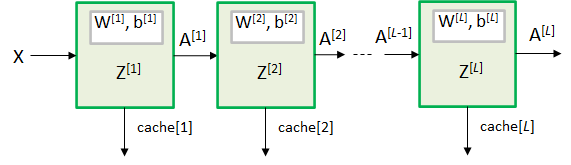

* Use a `for` loop to perform foward propagation for the hidden layers by calling the function `forward_one_layer` that you have just implemented.
* Use **relu** activation for all hidden layers, i.e., layer 1, 2, ..., $L-1$
* Use **sigmoid** activation for the output layer, i.e., layer $L$
* In each iteration, store all the `cache` value into the dictionary **`caches`** where the name for the keys of each layer are `cache1, cache2, ..., cache[L]`.


In [13]:
def forward (X, parameters, activation_functions):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    ----------
    - X:  numpy array of size (nx, m) 
        Input matrix
    - parameters: dictionary 
        Stores all network parameters, 
        e.g., for 2-layered NN {'W1': ..., 'b1':..., 'W2':..., 'b2': ...}
    - activation_functions: list 
        The activation functions used in each layer. The first item must be None
        since no activation for input layer.  
        e.g., for a 2-layered NN: [None, 'relu', 'sigmoid'] 
    
    Returns:
    -----------
    - Yhat: numpy array of size (nL, m)
        The activation value of the last value or the predicted value  
    - caches: dictionary
        Stores the cache generated from the forward_one_layer of each layer  
        e.g., for a 2-layered NN {'cache1': ..., 'cache2': ...}
    """

    caches = {}
    A = X
    L = len(parameters) // 2      # number of layers in the neural network
    
    for l in range(1,L+1):
        ### START CODE HERE ###
        
        # set the current input (~1 line)
        A_prev = A
        
        # compute the activation value and cache for current layer by calling
        # "forward_one_layer". (~1 line)
        A, cache = forward_one_layer(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation_function = activation_functions[l])
        # store cache into caches (~1 line)
        caches["cache" + str(l)] = cache        
        ### END CODE HERE ###

    Yhat = A    
        
    Yhat = np.clip(Yhat, 1e-5, 1-1e-5)  # clip Yhat for numerical stability
    assert(Yhat.shape[1] == X.shape[1])
            
    return Yhat, caches

**Question 6 (4 marks)**. Complete the `compute_cost` to compute the cost of the model by comparing the predicted value $\hat{Y}$ from the model and the actual label $Y$.

$$J(\hat{Y}, Y) = -\frac{1}{m} \sum\limits_{i = 1}^{m} (Y^{(i)}\log \hat{Y}^{(i)} + (1-Y^{(i)})\log (1- \hat{Y}^{(i)}) \tag{3}$$


In [14]:
def compute_cost(Yhat, Y):
    """
    Implement the binary cross entropy cost function

    Arguments:
    -----------
    - Yhat: numpy array of shape (1, number of examples)
        The predicted output (a probability vector) 
    - Y: numpy array of shape (1, number of examples)
        The ground truth vector (0: negative, 1: positive)

    Returns:
    ---------
    - cost: float
        The cross-entropy cost
    """    
    ### START CODE HERE ### (≈ 1 line)
    cost = np.squeeze(-1 / m *(np.dot(Y,np.log(Yhat.T)) + np.dot(1 - Y,np.log(1 - Yhat).T)))
    ### END CODE HERE ###
    
    assert(cost.shape == ())
    
    return cost

---
## SECTION 4: IMPLEMENT THE BACKPROPAGATION ALGORITHM

**Question 7 (18 marks)**.  Complete the function `backward_one_layer` which performs the backpropagation through **one** fully connected (FC) layer. The inputs to the model are:
* $\mathrm{cache}^{[l]} = (W^{[l]}, A^{[l-1]}, Z^{[l]}, A^{[l]})$ which is saved during the forward propagation. It stores the tensors required during backpropagation.
* $dA^{[l]}$ is the upstream gradient from the next layer $l+1$.

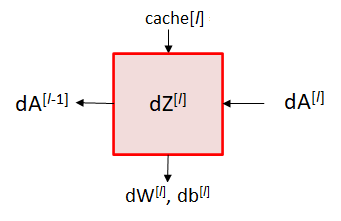

To perform backpropagation through layer $[l]$, it first backprop through the activation function followed by the summation function:

* Activation phase

    In the summation, the input is the upstream gradient $dA^{[l]}$ and the output is $dZ^{[l]}$. As mentioned, two types of activations are supported. 
   * *sigmoid* activation:
    $$dZ^{[l]} = A^{[l]}\circ (1-A^{[l]})\circ dA^{[l]}$$

   * *relu* activation:    
    $$dZ^{[l]} = (Z^{[l]}>0)\circ dA^{[l]}$$
 
  where $\circ$ is element-wise multiplication. 

* Summation phase 

    In the summation phase, the input is the upstream gradient $dZ^{[l]}$ and the outputs are compute $dW^{[l]}$, $ db^{[l]}$ and $dA^{[l-1]}$.

$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1]T} $$

$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}$$

$$ dA^{[l-1]} = W^TdZ$$


In [15]:
def backward_one_layer(dA, cache, activation_function):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    --------------
    - dA: numpy array of shape (number of nodes in current layer l, number of samples), same shape as A
        The upstream gradient for current layer, i.e., the gradient of cost w.r.t. A  
    - cache: tuple 
        Tuple of values (W, A_prev, Z, A) for the current layer l. The cache was
        saved during forward propagation 
    - activation: string
        The activation to be used in this layer.
        Options: "sigmoid" or "relu"
    
    Returns:
    - dA_prev: numpy array of shape (number of nodes in previous layer, number of samples), same shape as A_prev
        Gradient the cost w.r.t. of A_prev
    - dW: numpy array, shape is the same as W, i.e., (num of units in current layer l, num of units in previous layer l-1) 
        Gradient of the cost w.r.t. W for current layer l
    - db: numpy array, shape is the same as b, i.e., (num ofunits in current layer l, 1)
        Gradient of the cost w.r.t. b for current layer l
    """
    m = dA.shape[1]            # number of samples    
    W, A_prev, Z, A = cache    # get required tensors from cache

    ### START CODE HERE ### 

    # Activation layer (~4 lines)
    if (activation_function == "relu"):
            dZ = np.multiply(Z, dA) 
    elif activation_function == "sigmoid":
        dZ = np.multiply(np.multiply(A, (1-A)), dA)
        
    # Summation layer (~3 lines)
    dW = 1 / m * (np.dot(dZ,A_prev.T))
    db = 1 / m * (np.sum(dZ,axis = 1,keepdims = True))
    dA_prev = np.dot(W.T,dZ)
    ### END CODE HERE ###

    assert (dZ.shape == dA.shape)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == (W.shape[0],1))
        
    return dA_prev, dW, db

**Question 8 (12 marks)**. Now complete the `backward` function to implement the backpropagation for the whole network. The backpropagation algorithm computes the gradient of the cost w.r.t. the model parameters, i.e., $dW^{[1]}$, $db^{[1]}$, ..., $dW^{[L]}$, $db^{[L]}$. 

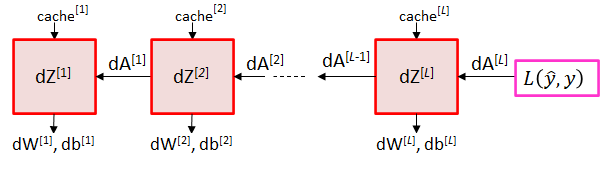

The backpropagation algorithm first backprops through the loss function. Then, it backprops through the fully connected layers starting from the last layer up to the first layer.

* To backprop through the loss function, the gradient $dA^{[L]}$ or $d\hat{Y}$ is given by:

$$dA^{[L]} = \frac{1 - Y}{1 - A^{[L]}} - \frac{Y}{A^{[L]}}$$

* To backprop through the fully connected layers, we just need to call the 
`backward_one_layer` function.

The output should be stored in the **dictionary** `grads` which contains the following keys:

```
grad = {'dW1': ...,
        'db1': ...,
            ...
        'dWL': ...,
        'dbL':...
       }
```

In [16]:
def backward(Yhat, Y, activation_functions, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    ------------
    - Yhat: numpy array of shape (1, num of samples)
        The predicted value, or the output of the forward propagation
    - Y: numpy array of shape (1, num of samples)
        The ground truth, or true label (0: negative, 1: positive samples)
    - caches: dictionary
        List of caches for each layer saved during forward propagation
        e.g., {'cache0', ... , 'cacheL'}
    - activation_functions: list
        List of activation functions selected for each layer
        e.g., for a 2-layered NN: {None, 'relu', 'sigmoid'}
   
    Returns:
    ------------
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = Yhat.shape[1]
    Y = Y.reshape(Yhat.shape) # after this line, Y is the same shape as Yhat
    
    ### START CODE HERE ### (1 line of code)
    # Backpropagation for loss function (~1 line)
    dYhat = - (np.divide(Y, Yhat) - np.divide(1 - Y, 1 - Yhat))
            
    # Backpropagation for layer l to L-1
    dA_prev = dYhat
    for l in reversed(range(1, L+1)):
        # get the cache 
        current_cache = caches['cache' + str(l)]        

        # compute dA_prev, dW, db by calling "backward_one_layer" (~1 line)
        dA_prev, dW, db = backward_one_layer(dA_prev, current_cache, activation_function = activation_functions[l])

        # store dW and db into grads (~2 lines)
        grads["dW" + str(l)] = dW
        grads["db" + str(l)] = db

    ### END CODE HERE ###
    
    return grads

---
## SECTION 5: TRAINING THE MODEL

**Question 9 (12 marks)**. Complete the function `train` which implements the gradient descent algorithm to train the network given a training set.

1. Initialize parameters
2. Loop for num_iterations:
    1. Forward propagation
    2. Compute cost function
    3. Backward propagation
    4. Update parameters (using parameters, and grads from backprop) 

        $$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \quad \forall l$$

        $$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \quad \forall l$$

where $\alpha$ is the learning rate. The trained network parameters, $W^{[l]}$ and $b^{[l]}$, are then stored into the `parameters` dictionary. 

In [17]:
def train(X, Y, layer_sizes, activation_functions, lr = 0.02, num_iters = 2000):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    -------------
    - X: ndarray of shape (num of features, num of samples)
        Input matrix
    - Y: ndarray of shape (1, num of samples)
        Targeted variable or ground truth
    - layers_sizes: list 
        The list containing number of nodes in each layer, including the input layer
        e.g., [30, 50, 1] where 30 is the number of features in each sample, 50 is
        the number of units in the first layer and 1 is the number of nodes in the 
        output layer
    - activation_functions: list 
        The list containing the activation functions for each layer
        The first item must be None because there are no activation for the input layer
        e.g., [None, "relu", "sigmoid"]
    - lr: float 
        The learning rate for gradient descent
    - num_iters: int 
        The number of iterations for gradient descent
    
    Returns:
    -------------
    - parameters: dictionary
        The parameters learnt by the model. The dictionary have the following
        keys: { 'W1': ..., 
                'b1': ...,
                    ...
                'WL': ..., 
                'bL': ...}
    - hist: list
        Stores the history of the costs at different time steps at an 
        interval of 200
    """

    np.random.seed(1)
    hist = []                         # keep track of cost
    
    L = len(layer_sizes) - 1 # number of layers 

    ### START CODE HERE ###

    # initialize network parameters by calling "init_params" (~1 line)
    parameters = init_params(layer_sizes)
    
    # repeat until convergence
    for i in range(0, num_iters):

        # forward propagation by calling "forward" (~1 line)
        Yhat, caches = forward(X, parameters, activation_functions)

        # compute cost by calling "compute_cost" (~1 line)
        cost = compute_cost(Yhat, Y)

        # backpropagation by calling "backward" (~1 line)
        grads = backward(Yhat, Y, activation_functions, caches)

        # update network parameters (~3 lines)
        for l in range(1, L+1):
            parameters["W" + str(l)] = parameters["W" + str(l)] - lr * grads["dW"+ str(l)]
            parameters["b" + str(l)] = parameters["b" + str(l)] - lr * grads["db"+ str(l)]
        
        # show output
        if i % 200 == 0 or i == num_iters - 1:
            hist.append(cost)
            print ("Cost after iteration %i: %f" %(i+1, cost))
            
    ### END CODE HERE ### 
    
    return parameters, hist

The following code then trains the model for the breast cancer Wisconsin dataset.

In [18]:
layer_sizes = (30, 30, 1)
activation_functions = (None, 'relu', 'sigmoid')
parameters, hist = train (X_train, Y_train, layer_sizes, activation_functions, lr=0.02, num_iters = 2000)

Cost after iteration 1: 0.693435
Cost after iteration 201: 0.651916
Cost after iteration 401: 0.612697
Cost after iteration 601: 0.365041
Cost after iteration 801: 0.255292
Cost after iteration 1001: 0.201737
Cost after iteration 1201: 0.166603
Cost after iteration 1401: 0.142632
Cost after iteration 1601: 0.125486
Cost after iteration 1801: 0.112568
Cost after iteration 2000: 0.102437


Now, let's plot the training history. You can see that the cost are decreasing 

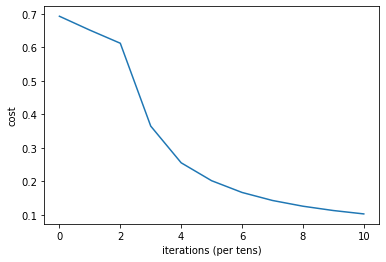

In [19]:
plt.plot(hist)
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

---
## SECTION 6: EVALUATE THE MODEL

**Question 10 (6 marks)**. Complete the function `evaluate` which computes the accuracy when the trained model (`parameters`) are evaluated on some samples `(X, Y)`.

In [20]:
from sklearn.metrics import accuracy_score

def evaluate(X, Y_actual, parameters, activation_functions):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    ------------
    X: numpy array of shape (num of fea, num of samples)
        Input matrix 
    parameters: dictionary
        Network parameters that have been trained. The parameters can be indexed 
        by the keys {'W1':..., 
                     'b1': ...,
                     ...
                     'WL':...,
                     'bL':... } 
    
    Returns:
    ------------    
    - Y_pred: ndarray of shape (1, num of samples)
        Predicted values for each sample
    - acc:  float
        The accuracy of the model on the dataset 
    """
    
    m = X.shape[1]
    
    
    ### START CODE HERE ###
    # Forward propagation by calling "forward" (~1 line)
    Y_scores, caches = forward(X, parameters, activation_functions)
        
    # threshold to get the predicted label (~1 line)
    Y_pred = (Y_scores >= 0.5).astype('int')

    # compute accuracy (~1 line)
    acc = accuracy_score(Y_pred.ravel(), Y_actual.ravel())
    ### END CODE HERE ###
    
    return Y_pred, acc

Compute the training accuracy

In [21]:
pred_train, acc_train = evaluate (X_train, Y_train, parameters, activation_functions)
print(f"Training accuracy = {acc_train*100:.2f}%")

Training accuracy = 98.20%


Compute the testing accuracy

In [22]:
fea_test, Y_test = load_dataset("testset.csv")
X_test = scaler.transform(fea_test).T

In [23]:
pred_test, acc_test = evaluate (X_test, Y_test, parameters, activation_functions)
print(f"Testing accuracy = {acc_test*100:.2f}%")

Testing accuracy = 98.57%


---
## SECTION 6: TRAINING WITH A DEEPER NETWORK 

**Question 11 (10 marks)**. Now, build a breast cancer detector with a deeper model where `layer_sizes = (30, 50, 50, 1)`, and an activation function of `(None, 'relu', 'relu', 'sigmoid')`


In [24]:
### START CODE (~3 lines) ###
layer_sizes = (30, 50, 50, 1)
activation_functions_deep = (None, 'relu', 'relu', 'sigmoid')
parameters_deep, hist = train(X_train, Y_train, layer_sizes, activation_functions_deep, lr=0.05, num_iters = 6000)
### END CODE HERE ###

Cost after iteration 1: 0.693149
Cost after iteration 201: 0.650593
Cost after iteration 401: 0.650156
Cost after iteration 601: 0.650068
Cost after iteration 801: 0.649978
Cost after iteration 1001: 0.649880
Cost after iteration 1201: 0.649773
Cost after iteration 1401: 0.649657
Cost after iteration 1601: 0.649529
Cost after iteration 1801: 0.649387
Cost after iteration 2001: 0.649227
Cost after iteration 2201: 0.649042
Cost after iteration 2401: 0.648824
Cost after iteration 2601: 0.648560
Cost after iteration 2801: 0.648228
Cost after iteration 3001: 0.647796
Cost after iteration 3201: 0.647201
Cost after iteration 3401: 0.646318
Cost after iteration 3601: 0.644840
Cost after iteration 3801: 0.641737
Cost after iteration 4001: 0.629590
Cost after iteration 4201: 0.236526
Cost after iteration 4401: 0.113615
Cost after iteration 4601: 0.082146
Cost after iteration 4801: 0.069524
Cost after iteration 5001: 0.063221
Cost after iteration 5201: 0.059684
Cost after iteration 5401: 0.057064

Evaluate the model - compute the training accuracy

In [25]:
pred_train_deep, acc_train_deep = evaluate (X_train, Y_train, parameters_deep, activation_functions_deep)
print(f"Training accuracy = {acc_train_deep*100:.2f}%")

Training accuracy = 98.80%


Evaluate the model - compute the testing accuracy

In [26]:
pred_test_deep, acc_test_deep = evaluate (X_test, Y_test, parameters_deep, activation_functions_deep)
print(f"Training accuracy = {acc_test_deep*100:.2f}%")

Training accuracy = 98.57%
